<a href="https://colab.research.google.com/github/OksanaGlazkova/DS-ML/blob/main/%D0%94%D0%97_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data = fetch_california_housing()

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y = pd.DataFrame(data.target, columns=['MedHouseVal'])
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
df = pd.concat([X,y], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass 

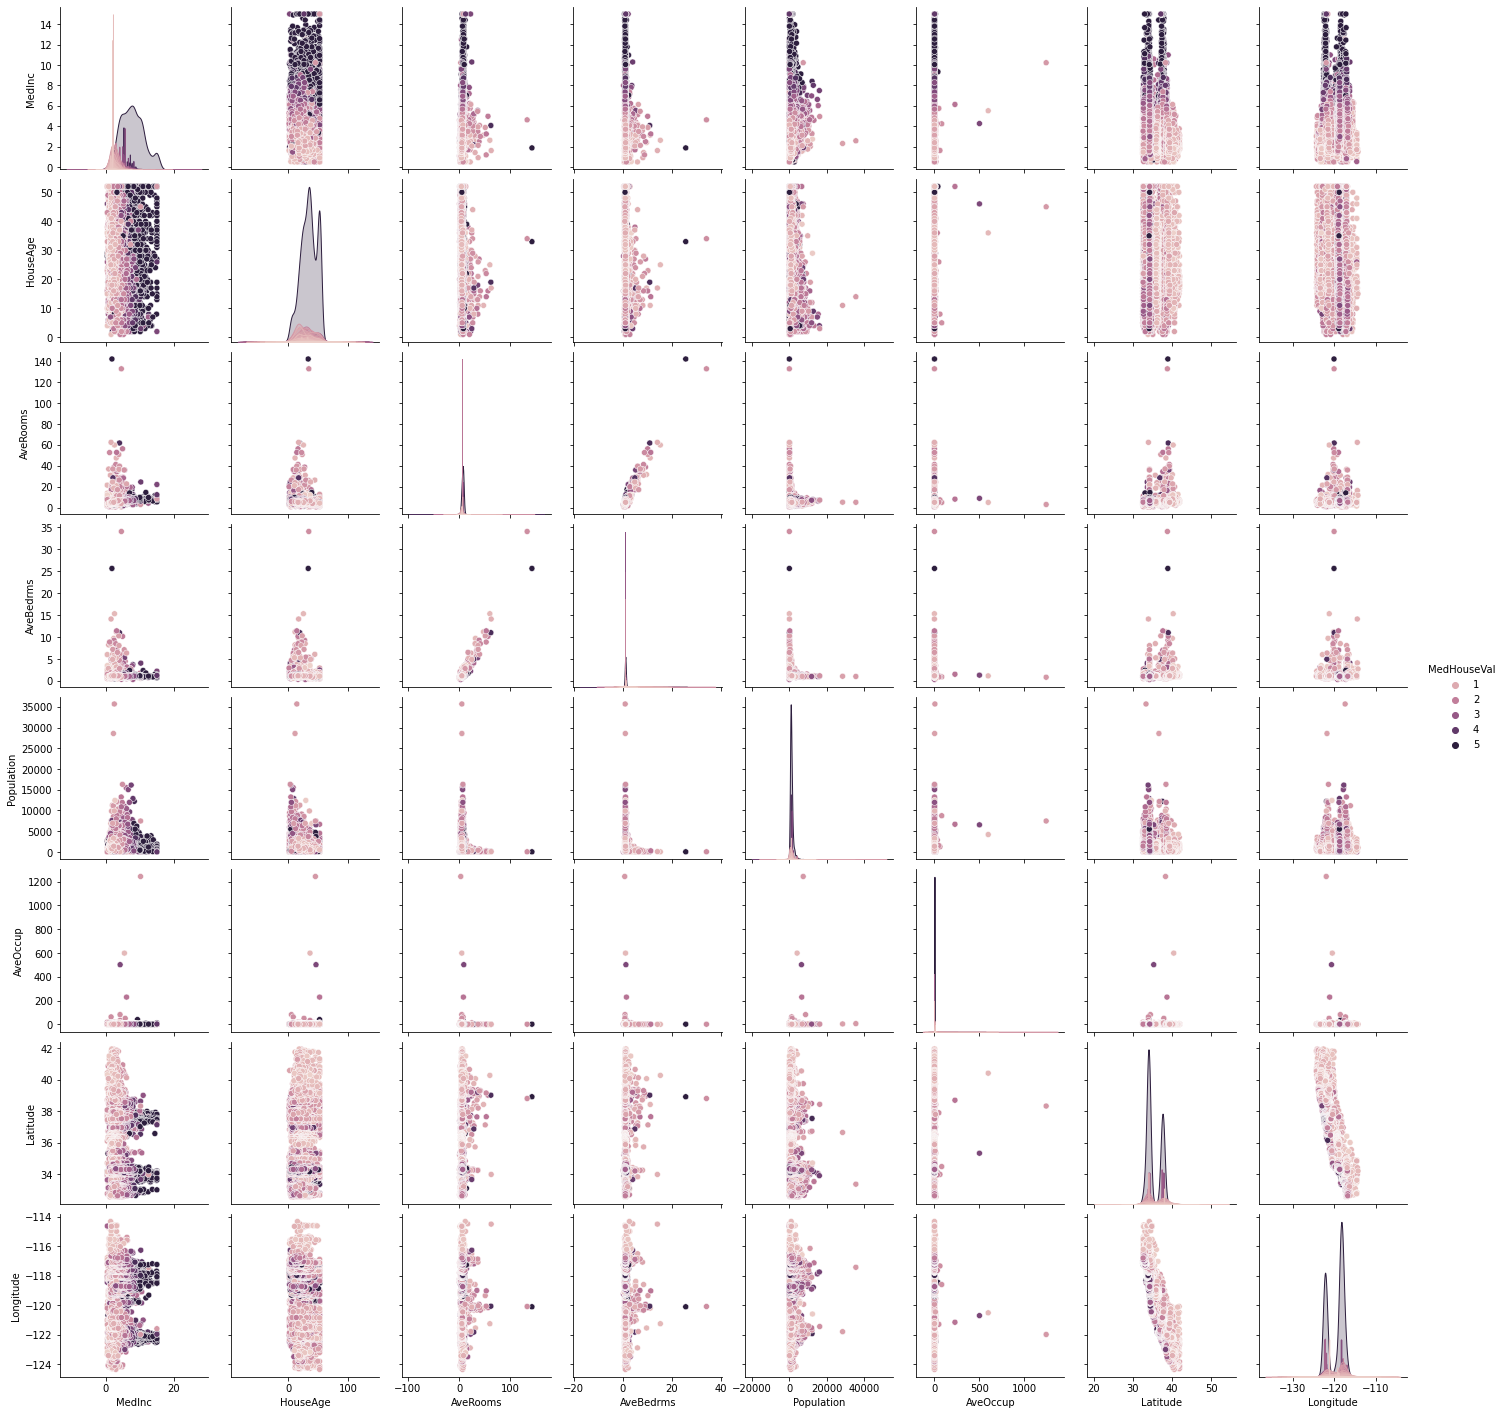

In [ ]:
sns.pairplot(df, hue='MedHouseVal')

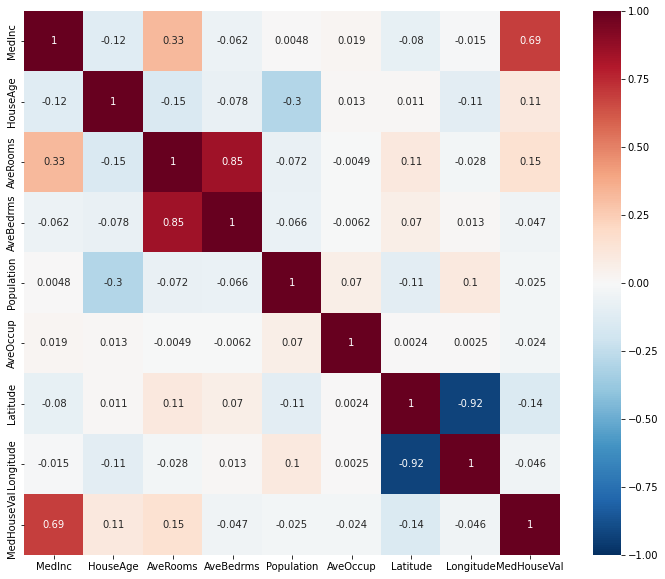

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)

На матрице корреляции видно, что максимальная зависимость переменной от показателя 'MedInc'.

In [ ]:
cols = ['MedInc', 'HouseAge', 'AveRooms',
       'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']

In [ ]:
X.dropna().shape

(20640, 8)

In [ ]:
get_score(X.dropna()[cols], y.dropna()['MedHouseVal'])

0.575787706032451

Немного улучшим показатели, убрав 'AveBedrms'

In [ ]:
cols2 = ['MedInc', 'HouseAge', 'AveRooms',
       'Population', 'AveOccup',
       'Latitude', 'Longitude']

In [ ]:
get_score(X.dropna()[cols2], y.dropna()['MedHouseVal'])

0.5823239094526445

Проверим на выбросы:

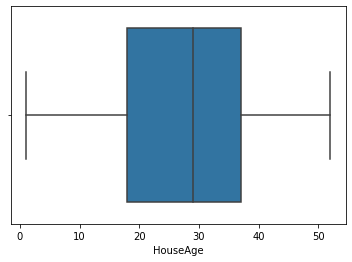

In [ ]:
get_boxplot(df, ['HouseAge'])

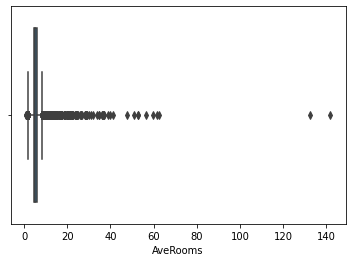

In [ ]:
get_boxplot(df, ['AveRooms'])

In [ ]:
df[df.AveRooms > 100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [ ]:
df = df.loc[df['AveRooms'] < 100]

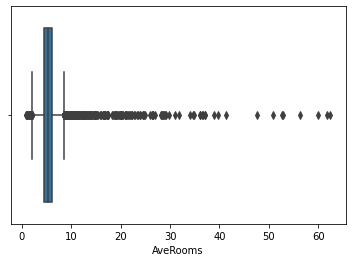

In [ ]:
get_boxplot(df, ['AveRooms'])

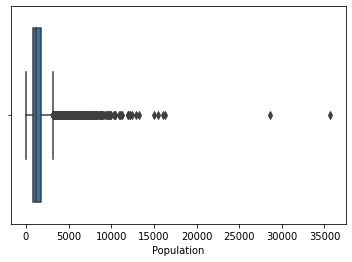

In [ ]:
get_boxplot(df, ['Population'])

In [ ]:
df[df.Population > 20000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344


In [ ]:
df = df.loc[df['Population'] < 20000]

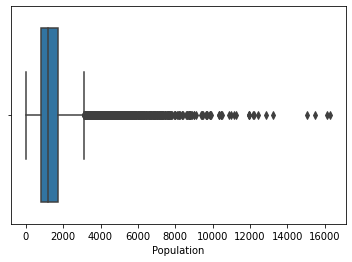

In [ ]:
get_boxplot(df, ['Population'])

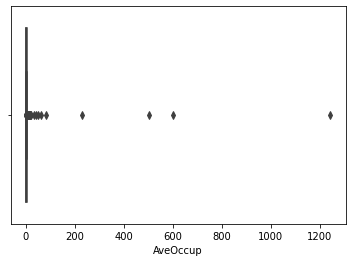

In [ ]:
get_boxplot(df, ['AveOccup'])

In [ ]:
df[df.AveOccup > 200]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


In [ ]:
df = df.loc[df['AveOccup'] < 200]

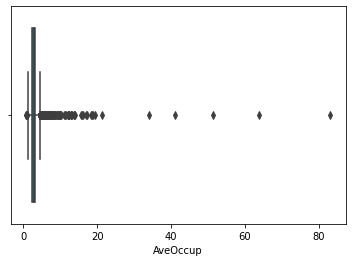

In [ ]:
get_boxplot(df, ['AveOccup'])

In [ ]:
df[df.AveOccup > 30]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500


In [ ]:
df = df.loc[df['AveOccup'] < 30]

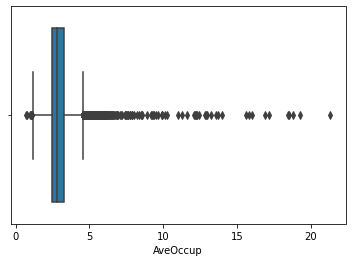

In [ ]:
get_boxplot(df, ['AveOccup'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20627 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20627 non-null  float64
 1   HouseAge     20627 non-null  float64
 2   AveRooms     20627 non-null  float64
 3   AveBedrms    20627 non-null  float64
 4   Population   20627 non-null  float64
 5   AveOccup     20627 non-null  float64
 6   Latitude     20627 non-null  float64
 7   Longitude    20627 non-null  float64
 8   MedHouseVal  20627 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


Немного улучшили показатели:

In [ ]:
get_score(df.dropna()[cols2], df.dropna()['MedHouseVal'])

0.6393297201764242